# Credit Card Lead Prediction

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
# Import Dataset
df = pd.read_csv("E:\\Pycharm Projects\\Machine_Learning\\GitHub\\Creditcard Lead Prediction\\train_s3TEQDk.csv")

# Print df
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [3]:
# Print shape of df
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 245725
Number of Columns: 11


In [4]:
# Check the datatypes of df
df.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [5]:
# Print the Statiscical description of the data
df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [6]:
# Information of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [7]:
# See unique values in each categorical column
for column in df.select_dtypes(include = ["object"]).columns:
    print("Unique categories in "+column+" are:")
    print(df[column].unique())
    print()

Unique categories in ID are:
['NNVBBKZB' 'IDD62UNG' 'HD3DSEMC' ... 'GEHAUCWT' 'GE7V8SAH' 'BOCZSWLJ']

Unique categories in Gender are:
['Female' 'Male']

Unique categories in Region_Code are:
['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG276' 'RG263' 'RG250' 'RG255' 'RG253' 'RG271']

Unique categories in Occupation are:
['Other' 'Salaried' 'Self_Employed' 'Entrepreneur']

Unique categories in Channel_Code are:
['X3' 'X1' 'X2' 'X4']

Unique categories in Credit_Product are:
['No' nan 'Yes']

Unique categories in Is_Active are:
['No' 'Yes']



## Hypothesis Testing

### *Check Relation Between Gender and Is_lead (Using Chi-square test)* 

In [8]:
# Cross tab between "Gender" and "Is_Lead".
Gender_Is_lead = pd.crosstab(df["Is_Lead"], df["Gender"])

# Print Gender_Is_lead
print(Gender_Is_lead)

Gender   Female   Male
Is_Lead               
0         88823  98614
1         22705  35583


In [9]:
# Apply Chi-Square test
# H0: There is no significance relation between Gender and Is_Lead
# H1: There is significance relation between Gender and Is_Lead
# If p-value < 0.05, Reject H0
stat, p, dof, expected = chi2_contingency(Gender_Is_lead)
print("Observed Statistic: ", stat)
print("p-value: ", p)

Observed Statistic:  1275.9029016565435
p-value:  1.949380935011988e-279


*p-value < 0.05, So Reject H0*
<br>*So, There is significance relation between Gender and Is_Lead*

### *Check Relation Between Region_Code and Is_lead (Using Chi-square test)*

In [10]:
# Cross tab between "Gender" and "Is_Lead".
Region_Code_Is_lead = pd.crosstab(df["Is_Lead"], df["Region_Code"])

# Print Gender_Is_lead
Region_Code_Is_lead

Region_Code,RG250,RG251,RG252,RG253,RG254,RG255,RG256,RG257,RG258,RG259,...,RG275,RG276,RG277,RG278,RG279,RG280,RG281,RG282,RG283,RG284
Is_Lead,,,,,,,,,,,,,,,,,,,,,
0,2103,4569,3694,1377,21127,1549,2446,4931,1521,2085,...,2702,1996,9851,1422,3079,9766,3979,4709,20531,13504
1,393,1381,592,481,5713,469,401,1170,430,501,...,543,768,2975,400,897,3009,1114,1120,8885,5816


In [11]:
# Apply Chi-Square test
# H0: There is no significance relation between Region_Code and Is_Lead
# H1: There is significance relation between Region_Code and Is_Lead
# If p-value < 0.05, Reject H0
stat, p, dof, expected = chi2_contingency(Region_Code_Is_lead)
print("Observed Statistic: ", stat)
print("p-value: ", p)

Observed Statistic:  3913.669551933591
p-value:  0.0


*p-value < 0.05, Reject H0
<br>So, There is significance relation between Region_Code and Is_Lead*

### *Check Relation Between Occupation and Is_lead (Using Chi-square test)*

In [12]:
# Cross tab between "Occupation" and "Is_Lead".
Occupation_Is_lead = pd.crosstab(df["Is_Lead"], df["Occupation"])

# Print Occupation_Is_lead
Occupation_Is_lead

Occupation,Entrepreneur,Other,Salaried,Self_Employed
Is_Lead,,,,
0,905,52984,60503,73045
1,1762,17189,11496,27841


In [13]:
# Apply Chi-Square test
# H0: There is no significance relation between Occupation and Is_Lead
# H1: There is significance relation between Occupation and Is_Lead
# If p-value < 0.05, Reject H0
stat, p, dof, expected = chi2_contingency(Occupation_Is_lead)
print("Observed Statistic: ", stat)
print("p-value: ", p)

Observed Statistic:  5896.249668475439
p-value:  0.0


*p-value < 0.05, Reject H0
<br>So, There is significance relation between Occupation and Is_Lead*

### *Check Relation Between Channel_Code and Is_lead (Using Chi-square test)* 

In [14]:
# Cross tab between "Channel_Code" and "Is_Lead".
Channel_Code_Is_lead = pd.crosstab(df["Is_Lead"], df["Channel_Code"])

# Print Channel_Code_Is_lead
Channel_Code_Is_lead

Channel_Code,X1,X2,X3,X4
Is_Lead,,,,
0,94236,45519,43493,4189
1,9482,22207,25219,1380


In [15]:
# Apply Chi-Square test
# H0: There is no significance relation between Channel_Code and Is_Lead
# H1: There is significance relation between Channel_Code and Is_Lead
# If p-value < 0.05, Reject H0
stat, p, dof, expected = chi2_contingency(Channel_Code_Is_lead)
print("Observed Statistic: ", stat)
print("p-value: ", p)

Observed Statistic:  21664.453956739817
p-value:  0.0


*p-value < 0.05, Reject H0
<br>So, There is significance relation between Channel_Code and Is_Lead*

### *Check Relation Between Credict_Product and Is_lead (Using Chi-square test)* 

In [16]:
# Cross tab between "Credit_Product" and "Is_Lead".
Credit_Product_Is_lead = pd.crosstab(df["Is_Lead"], df["Credit_Product"])

# Print Credit_Product_Is_lead
Credit_Product_Is_lead

Credit_Product,No,Yes
Is_Lead,,
0,133734,49353
1,10623,22690


In [17]:
# Apply Chi-Square test
# H0: There is no significance relation between Credit_Product and Is_Lead
# H1: There is significance relation between Credit_Product and Is_Lead
# If p-value < 0.05, Reject H0
stat, p, dof, expected = chi2_contingency(Credit_Product_Is_lead)
print("Observed Statistic: ", stat)
print("p-value: ", p)

Observed Statistic:  21494.00881079159
p-value:  0.0


*p-value < 0.05, Reject H0
<br>So, There is significance relation between Credit_Product and Is_Lead*

### *Check Relation Between Is_Active and Is_lead (Using Chi-square test)* 

In [18]:
# Cross tab between "Is_Active" and "Is_Lead".
Is_Active_Is_lead = pd.crosstab(df["Is_Lead"], df["Is_Active"])

# Print Is_Active_Is_lead
Is_Active_Is_lead

Is_Active,No,Yes
Is_Lead,,
0,119007,68430
1,31283,27005


In [19]:
# Apply Chi-Square test
# H0: There is no significance relation between Is_Active and Is_Lead
# H1: There is significance relation between Is_Active and Is_Lead
# If p-value < 0.05, Reject H0
stat, p, dof, expected = chi2_contingency(Is_Active_Is_lead)
print("Observed Statistic: ", stat)
print("p-value: ", p)

Observed Statistic:  1805.2967681025368
p-value:  0.0


*p-value < 0.05, Reject H0
<br>So, There is significance relation between Is_Active and Is_Lead*

### *Check Relation Between Age and Is_lead (Using 2-Sample ttest)*

In [20]:
# Filter data with Is_Lead
df_Is_Lead_0 = df[df["Is_Lead"] == 0]["Age"]
df_Is_Lead_1 = df[df["Is_Lead"] == 1]["Age"]

In [21]:
# Perform 2-Sample ttest
# H0: There is no significance relation between Age and Is_Lead
# H1: There is significance relation between Age and Is_Lead
# If p-value < 0.05, Reject H0
stats.ttest_ind(df_Is_Lead_0, df_Is_Lead_1)

Ttest_indResult(statistic=-117.59063299067188, pvalue=0.0)

*p-value < 0.05, Reject H0
<br>So, There is significance relation between Age and Is_Lead*

### *Check Relation Between Age and Is_lead (Using 2-Sample ttest)*

### *Check Relation Between Vintage and Is_lead (Using 2-Sample ttest)*

In [22]:
# Filter data with Is_Lead
df_Is_Lead_0 = df[df["Is_Lead"] == 0]["Vintage"]
df_Is_Lead_1 = df[df["Is_Lead"] == 1]["Vintage"]

In [23]:
# Perform 2-Sample ttest
# H0: There is no significance relation between Vintage and Is_Lead
# H1: There is significance relation between Vintage and Is_Lead
# If p-value < 0.05, Reject H0
stats.ttest_ind(df_Is_Lead_0, df_Is_Lead_1)

Ttest_indResult(statistic=-144.37999711647805, pvalue=0.0)

*p-value < 0.05, Reject H0
<br>So, There is significance relation between Vintage and Is_Lead*

### *Check Relation Between Avg_Account_Balance and Is_lead (Using 2-Sample ttest)*

In [24]:
# Filter data with Is_Lead
df_Is_Lead_0 = df[df["Is_Lead"] == 0]["Avg_Account_Balance"]
df_Is_Lead_1 = df[df["Is_Lead"] == 1]["Avg_Account_Balance"]

In [25]:
# Perform 2-Sample ttest
# H0: There is no significance relation between Avg_Account_Balance and Is_Lead
# H1: There is significance relation between Avg_Account_Balance and Is_Lead
# If p-value < 0.05, Reject H0
stats.ttest_ind(df_Is_Lead_0, df_Is_Lead_1)

Ttest_indResult(statistic=-26.493740899914506, pvalue=1.8899852444406045e-154)

*p-value < 0.05, Reject H0
<br>So, There is significance relation between Avg_Account_Balance and Is_Lead*

## Data Preprocessing

In [26]:
# Drop ID Column
df = df.drop(columns = ["ID"])

# Fill Na's in Credit_Product with word "Missing"
df["Credit_Product"] = df["Credit_Product"].fillna("Missing")

# Print df
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


(array([106024.,  77325.,  46049.,  16327.]),
 array([23. , 38.5, 54. , 69.5, 85. ]),
 <BarContainer object of 4 artists>)

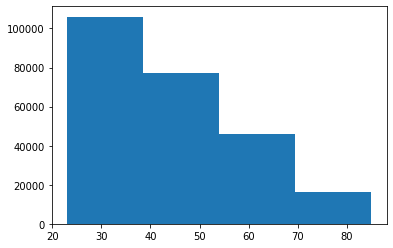

In [34]:
# Plot Histogram of Age
plt.hist(df["Age"], bins = 4)

In [36]:
# Create bins according to the histogram
df["Age"] = pd.cut(df["Age"], bins = [23, 38.5, 54, 69.5, 85], labels = ["Adult_age", "Middle_age", "Uppermiddle_age", "Old_age"])
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,Old_age,RG268,Other,X3,43,No,1045696,No,0
1,Female,Adult_age,RG277,Salaried,X1,32,No,581988,No,0
2,Female,Uppermiddle_age,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,Adult_age,RG270,Salaried,X1,19,No,470454,No,0
4,Female,Adult_age,RG282,Salaried,X1,33,No,886787,No,0


(array([151102.,  62856.,  31767.]),
 array([  7.        ,  49.66666667,  92.33333333, 135.        ]),
 <BarContainer object of 3 artists>)

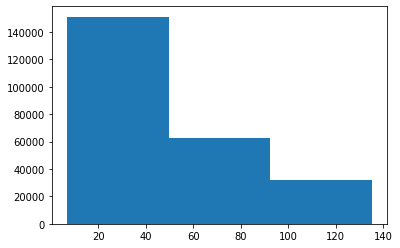

In [38]:
# Plot Histogram of Vintage
plt.hist(df["Vintage"], bins = 3)

In [40]:
# # Create bins according to the histogram
df["Vintage"] = pd.cut(df["Vintage"], bins = [7, 49, 92, 135], labels = ["Lower_Vintage", "Medium_Vintage", "Higher_Vintage"])

In [41]:
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,Old_age,RG268,Other,X3,Lower_Vintage,No,1045696,No,0
1,Female,Adult_age,RG277,Salaried,X1,Lower_Vintage,No,581988,No,0
2,Female,Uppermiddle_age,RG268,Self_Employed,X3,Lower_Vintage,No,1484315,Yes,0
3,Male,Adult_age,RG270,Salaried,X1,Lower_Vintage,No,470454,No,0
4,Female,Adult_age,RG282,Salaried,X1,Lower_Vintage,No,886787,No,0


(array([2.22392e+05, 2.01740e+04, 2.32300e+03, 7.00000e+02, 1.36000e+02]),
 array([   20790. ,  2087033.8,  4153277.6,  6219521.4,  8285765.2,
        10352009. ]),
 <BarContainer object of 5 artists>)

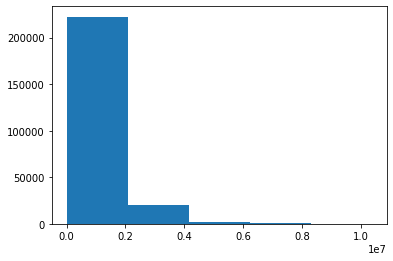

In [48]:
# Plot Histogram of Vintage
plt.hist(df["Avg_Account_Balance"], bins = 5)

In [50]:
# Create bins according to the histogram
df["Avg_Account_Balance"] = pd.cut(df["Avg_Account_Balance"], 
                                   bins = [20790.0, 2087033.8, 4153277.6, 6219521.4,  8285765.2, 10352009.0],
                                   labels = ["Tier1", "Tier2", "Tier3", "Tier4", "Tier5"])

df.head()                                   

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,Old_age,RG268,Other,X3,Lower_Vintage,No,Tier1,No,0
1,Female,Adult_age,RG277,Salaried,X1,Lower_Vintage,No,Tier1,No,0
2,Female,Uppermiddle_age,RG268,Self_Employed,X3,Lower_Vintage,No,Tier1,Yes,0
3,Male,Adult_age,RG270,Salaried,X1,Lower_Vintage,No,Tier1,No,0
4,Female,Adult_age,RG282,Salaried,X1,Lower_Vintage,No,Tier1,No,0


In [52]:
# Split Data into Dependent and Independent Variable
X = df.drop(columns = ["Is_Lead"]).copy()
y = df["Is_Lead"]

In [53]:
# Apply One-Hot-Encoding
X_Encoded = pd.get_dummies(X, drop_first = True)
# Print df_Encoded
X_Encoded.head()

,Gender_Male,Age_Middle_age,Age_Uppermiddle_age,Age_Old_age,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,...,Channel_Code_X4,Vintage_Medium_Vintage,Vintage_Higher_Vintage,Credit_Product_No,Credit_Product_Yes,Avg_Account_Balance_Tier2,Avg_Account_Balance_Tier3,Avg_Account_Balance_Tier4,Avg_Account_Balance_Tier5,Is_Active_Yes
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [54]:
# Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_Encoded, y, train_size = 0.85, random_state = 1, stratify = y)

In [55]:
# Print X_train shape
X_train.shape

(208866, 53)

In [56]:
# Print X_test shape
X_test.shape

(36859, 53)

## Model Building

In [57]:
# Build Decision Tree Model
dtc_model = DecisionTreeClassifier()
# Fit the Data
dtc_model.fit(X_train, y_train)
# Predict with X_test
y_pred = dtc_model.predict(X_test)
# Print ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, dtc_model.predict_proba(X_test)[:,1]))
# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.8188844757085265
[[26672  1444]
 [ 4127  4616]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     28116
           1       0.76      0.53      0.62      8743

    accuracy                           0.85     36859
   macro avg       0.81      0.74      0.76     36859
weighted avg       0.84      0.85      0.84     36859



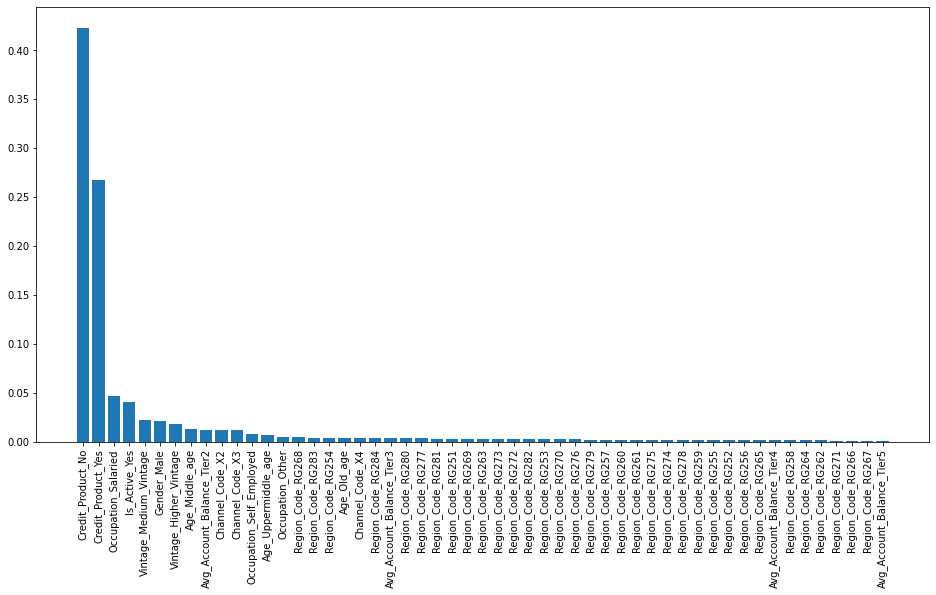

In [58]:
# Create Dataframe with Feature Importances
features_df = pd.DataFrame({"Feature": X_train.columns,
                            "Feature Importance": dtc_model.feature_importances_})

# Sort features_df by feature importance
features_df = features_df.sort_values(by = "Feature Importance", ascending = False)

# Plot the feature importances
plt.figure(figsize = (16,8))
plt.bar(x = features_df["Feature"], height = features_df["Feature Importance"])
plt.xticks(rotation = "vertical")
plt.show()

In [59]:
# Select Features
selected_features = features_df[features_df["Feature Importance"] > 0.005]["Feature"].unique()
print(selected_features)

['Credit_Product_No' 'Credit_Product_Yes' 'Occupation_Salaried'
 'Is_Active_Yes' 'Vintage_Medium_Vintage' 'Gender_Male'
 'Vintage_Higher_Vintage' 'Age_Middle_age' 'Avg_Account_Balance_Tier2'
 'Channel_Code_X2' 'Channel_Code_X3' 'Occupation_Self_Employed'
 'Age_Uppermiddle_age' 'Occupation_Other']


In [60]:
# Build Decision Tree Model with selected features
dtc_model = DecisionTreeClassifier()
# Fit the Data
dtc_model.fit(X_train[selected_features], y_train)
# Predict with X_test
y_pred = dtc_model.predict(X_test[selected_features])
# Print ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, dtc_model.predict_proba(X_test[selected_features])[:,1]))
# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.8639324218759599
[[27123   993]
 [ 4168  4575]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     28116
           1       0.82      0.52      0.64      8743

    accuracy                           0.86     36859
   macro avg       0.84      0.74      0.78     36859
weighted avg       0.86      0.86      0.85     36859



In [61]:
# Build Random Forest Model
rfc_model = RandomForestClassifier()
# Fit the Data
rfc_model.fit(X_train, y_train)
# Predict with X_test
y_pred = rfc_model.predict(X_test)
# Print ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, rfc_model.predict_proba(X_test)[:,1]))
# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.8427420573940607
[[26531  1585]
 [ 3871  4872]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     28116
           1       0.75      0.56      0.64      8743

    accuracy                           0.85     36859
   macro avg       0.81      0.75      0.77     36859
weighted avg       0.84      0.85      0.84     36859



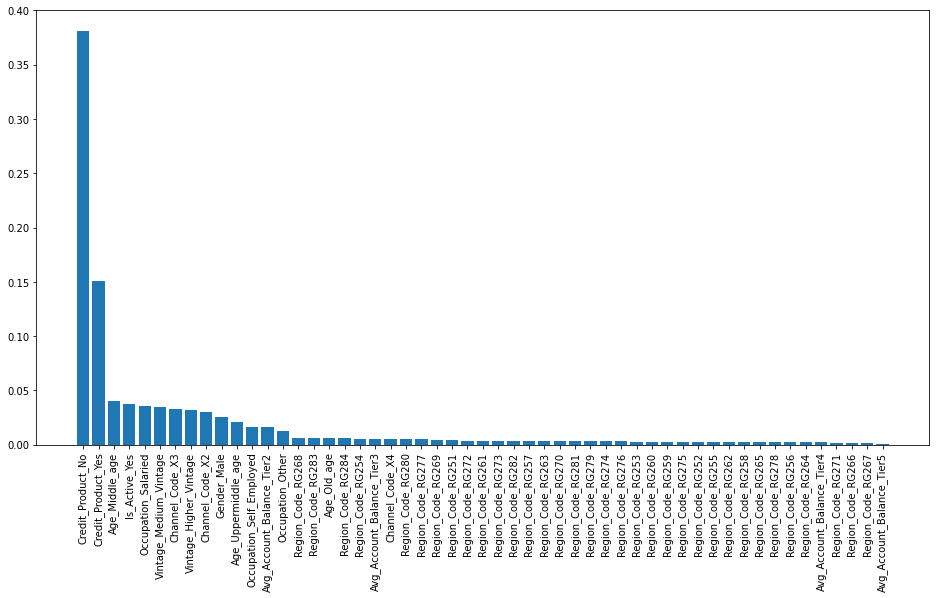

In [62]:
# Create Dataframe with Feature Importances
features_df = pd.DataFrame({"Feature": X_train.columns,
                            "Feature Importance": rfc_model.feature_importances_})

# Sort features_df by feature importance
features_df = features_df.sort_values(by = "Feature Importance", ascending = False)

# Plot the feature importances
plt.figure(figsize = (16,8))
plt.bar(x = features_df["Feature"], height = features_df["Feature Importance"])
plt.xticks(rotation = "vertical")
plt.show()

In [63]:
# Select Features
selected_features = features_df[features_df["Feature Importance"] > 0.004]["Feature"].unique()
print(selected_features)

['Credit_Product_No' 'Credit_Product_Yes' 'Age_Middle_age' 'Is_Active_Yes'
 'Occupation_Salaried' 'Vintage_Medium_Vintage' 'Channel_Code_X3'
 'Vintage_Higher_Vintage' 'Channel_Code_X2' 'Gender_Male'
 'Age_Uppermiddle_age' 'Occupation_Self_Employed'
 'Avg_Account_Balance_Tier2' 'Occupation_Other' 'Region_Code_RG268'
 'Region_Code_RG283' 'Age_Old_age' 'Region_Code_RG284' 'Region_Code_RG254'
 'Avg_Account_Balance_Tier3' 'Channel_Code_X4' 'Region_Code_RG280'
 'Region_Code_RG277' 'Region_Code_RG269']


In [64]:
# Build Random Forest Model with selected features
rfc_model = RandomForestClassifier()
# Fit the Data
rfc_model.fit(X_train[selected_features], y_train)
# Predict with X_test
y_pred = rfc_model.predict(X_test[selected_features])
# Print ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, rfc_model.predict_proba(X_test[selected_features])[:,1]))
# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.8558982177510804
[[26786  1330]
 [ 3941  4802]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     28116
           1       0.78      0.55      0.65      8743

    accuracy                           0.86     36859
   macro avg       0.83      0.75      0.78     36859
weighted avg       0.85      0.86      0.85     36859



In [65]:
# Build Adaboost Model
adc_model = AdaBoostClassifier()
# Fit the Data
adc_model.fit(X_train, y_train)
# Predict with X_test
y_pred = adc_model.predict(X_test)
# Print ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, adc_model.predict_proba(X_test)[:,1]))
# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.858717917569224
[[27386   730]
 [ 4536  4207]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     28116
           1       0.85      0.48      0.62      8743

    accuracy                           0.86     36859
   macro avg       0.86      0.73      0.76     36859
weighted avg       0.86      0.86      0.84     36859



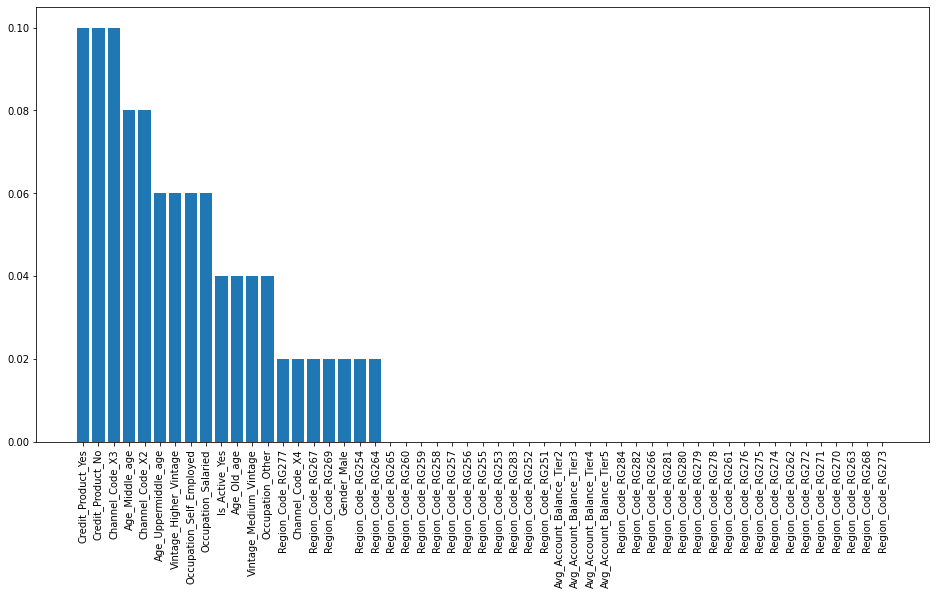

In [66]:
# Create Dataframe with Feature Importances
features_df = pd.DataFrame({"Feature": X_train.columns,
                            "Feature Importance": adc_model.feature_importances_})

# Sort features_df by feature importance
features_df = features_df.sort_values(by = "Feature Importance", ascending = False)

# Plot the feature importances
plt.figure(figsize = (16,8))
plt.bar(x = features_df["Feature"], height = features_df["Feature Importance"])
plt.xticks(rotation = "vertical")
plt.show()

In [67]:
# Select Features
selected_features = features_df[features_df["Feature Importance"] > 0.004]["Feature"].unique()
print(selected_features)

['Credit_Product_Yes' 'Credit_Product_No' 'Channel_Code_X3'
 'Age_Middle_age' 'Channel_Code_X2' 'Age_Uppermiddle_age'
 'Vintage_Higher_Vintage' 'Occupation_Self_Employed' 'Occupation_Salaried'
 'Is_Active_Yes' 'Age_Old_age' 'Vintage_Medium_Vintage' 'Occupation_Other'
 'Region_Code_RG277' 'Channel_Code_X4' 'Region_Code_RG267'
 'Region_Code_RG269' 'Gender_Male' 'Region_Code_RG254' 'Region_Code_RG264']


In [68]:
# Build AdaboostClassifier
adc_model = AdaBoostClassifier()
# Fit the Data
adc_model.fit(X_train[selected_features], y_train)
# Predict with X_test
y_pred = adc_model.predict(X_test[selected_features])
# Print ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, adc_model.predict_proba(X_test[selected_features])[:,1]))
# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.858717917569224
[[27386   730]
 [ 4536  4207]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     28116
           1       0.85      0.48      0.62      8743

    accuracy                           0.86     36859
   macro avg       0.86      0.73      0.76     36859
weighted avg       0.86      0.86      0.84     36859



In [69]:
# Build Gradient Boositng Model
gbc_model = GradientBoostingClassifier()
# Fit the Data
gbc_model.fit(X_train, y_train)
# Predict with X_test
y_pred = gbc_model.predict(X_test)
# Print ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, gbc_model.predict_proba(X_test)[:,1]))
# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.8659570930528542
[[27085  1031]
 [ 4135  4608]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     28116
           1       0.82      0.53      0.64      8743

    accuracy                           0.86     36859
   macro avg       0.84      0.75      0.78     36859
weighted avg       0.86      0.86      0.85     36859



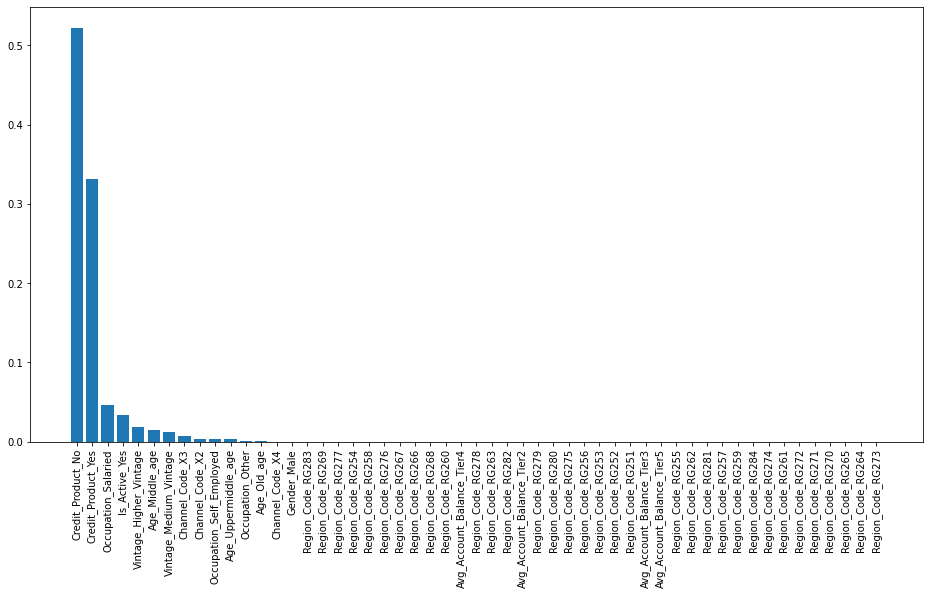

In [70]:
# Create Dataframe with Feature Importances
features_df = pd.DataFrame({"Feature": X_train.columns,
                            "Feature Importance": gbc_model.feature_importances_})

# Sort features_df by feature importance
features_df = features_df.sort_values(by = "Feature Importance", ascending = False)

# Plot the feature importances
plt.figure(figsize = (16,8))
plt.bar(x = features_df["Feature"], height = features_df["Feature Importance"])
plt.xticks(rotation = "vertical")
plt.show()

In [71]:
# Select Features
selected_features = features_df[features_df["Feature Importance"] > 0.001]["Feature"].unique()
print(selected_features)

['Credit_Product_No' 'Credit_Product_Yes' 'Occupation_Salaried'
 'Is_Active_Yes' 'Vintage_Higher_Vintage' 'Age_Middle_age'
 'Vintage_Medium_Vintage' 'Channel_Code_X3' 'Channel_Code_X2'
 'Occupation_Self_Employed' 'Age_Uppermiddle_age' 'Occupation_Other']


In [72]:
# Build Gradient Boositng Model
gbc_model = GradientBoostingClassifier()
# Fit the Data
gbc_model.fit(X_train[selected_features], y_train)
# Predict with X_test
y_pred = gbc_model.predict(X_test[selected_features])
# Print ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, gbc_model.predict_proba(X_test[selected_features])[:,1]))
# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

ROC AUC Score: 0.8652491958813072
[[27076  1040]
 [ 4110  4633]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     28116
           1       0.82      0.53      0.64      8743

    accuracy                           0.86     36859
   macro avg       0.84      0.75      0.78     36859
weighted avg       0.86      0.86      0.85     36859



In [84]:
# Build Gradient Boositng Model
xgb_model = XGBClassifier(scale_pos_weight = 4)
# Fit the Data
xgb_model.fit(X_train, y_train)
# Predict with X_test
y_pred = xgb_model.predict(X_test)
# Print ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]))
# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

e:\pycharm projects\machine_learning\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[13:29:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROC AUC Score: 0.8651069708479017
[[22649  5467]
 [ 1875  6868]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     28116
           1       0.56      0.79      0.65  

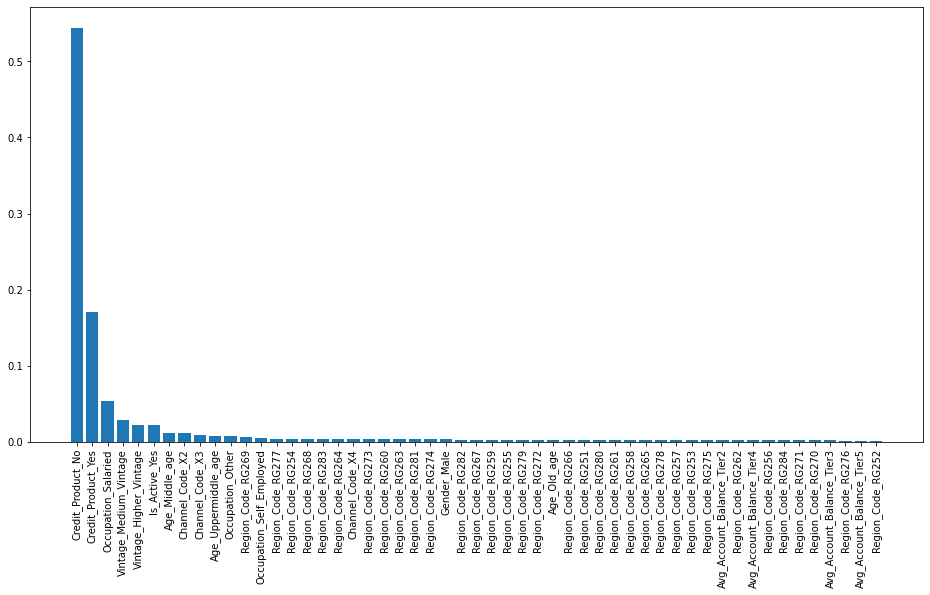

In [74]:
# Create Dataframe with Feature Importances
features_df = pd.DataFrame({"Feature": X_train.columns,
                            "Feature Importance": xgb_model.feature_importances_})

# Sort features_df by feature importance
features_df = features_df.sort_values(by = "Feature Importance", ascending = False)

# Plot the feature importances
plt.figure(figsize = (16,8))
plt.bar(x = features_df["Feature"], height = features_df["Feature Importance"])
plt.xticks(rotation = "vertical")
plt.show()

In [75]:
# Select Features
selected_features = features_df[features_df["Feature Importance"] > 0.005]["Feature"].unique()
print(selected_features)

['Credit_Product_No' 'Credit_Product_Yes' 'Occupation_Salaried'
 'Vintage_Medium_Vintage' 'Vintage_Higher_Vintage' 'Is_Active_Yes'
 'Age_Middle_age' 'Channel_Code_X2' 'Channel_Code_X3'
 'Age_Uppermiddle_age' 'Occupation_Other' 'Region_Code_RG269'
 'Occupation_Self_Employed']


In [85]:
# Build Gradient Boositng Model
xgb_model = XGBClassifier(scale_pos_weight = 4)
# Fit the Data
xgb_model.fit(X_train[selected_features], y_train)
# Predict with X_test
y_pred = xgb_model.predict(X_test[selected_features])
# Print ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(X_test[selected_features])[:,1]))
# Confusion Matrix and Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

e:\pycharm projects\machine_learning\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[13:30:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROC AUC Score: 0.8665736401897162
[[22607  5509]
 [ 1852  6891]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86     28116
           1       0.56      0.79      0.65  